In [9]:
import numpy as np
import matplotlib.pyplot as plot
import random
import time
import h5py
from scipy.signal import find_peaks


In [37]:
#read in file name
filename = "/sdf/data/lcls/ds/xcs/xcsx48919/hdf5/smalldata/xcsx48919_Run0147.h5"

exp = 'xcsx48919'
run = 147

f = h5py.File(filename,'r')

#just printing out types of data in the file
def print_name(name, obj):
    if isinstance(obj, h5py.Dataset):
        print('Dataset:', name)
    elif isinstance(obj, h5py.Group):
        print('Group:', name)

with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    h5f.visititems(print_name) # print all structure names

Group: Sums
Dataset: Sums/acq01_calib
Dataset: Sums/acq01_calib_dropped
Dataset: Sums/acq01_calib_dropped_square
Group: UserDataCfg
Group: UserDataCfg/EOrbits
Dataset: UserDataCfg/EOrbits/detname
Dataset: UserDataCfg/EOrbits/name
Group: UserDataCfg/acq01
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_bound
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_name
Dataset: UserDataCfg/acq01/ROI_0__ROI_0_writeArea
Dataset: UserDataCfg/acq01/applyMask
Dataset: UserDataCfg/acq01/dataAccessTime
Dataset: UserDataCfg/acq01/delayTime
Dataset: UserDataCfg/acq01/fullScale
Dataset: UserDataCfg/acq01/interval
Dataset: UserDataCfg/acq01/maskCentral
Dataset: UserDataCfg/acq01/nSamples
Dataset: UserDataCfg/acq01/offset
Dataset: UserDataCfg/acq01/run
Group: UserDataCfg/damage
Dataset: UserDataCfg/damage/detAlias
Dataset: UserDataCfg/damage/detNames
Dataset: UserDataCfg/damage/name
Group: UserDataCfg/diodeGon
Dataset: UserDataCfg/diodeGon/detname
Dataset: UserDataCfg/diodeGon/name
Dataset: UserDataCfg/diodeGon/savePos
Gro

ipm [269178.    270731.75  255572.5   ... 219225.75  220479.375 262390.875]
shape (5932, 4, 4000)
ipm len 5932


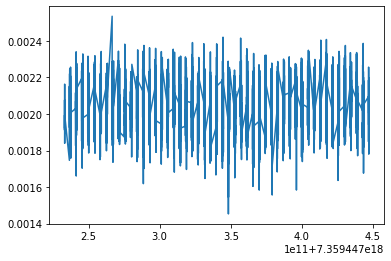

In [38]:
#opening relevant data from the h5 file
with h5py.File(filename, 'r')  as h5f: # file will be closed when we exit from WITH scope
    sums_acq01 = h5f['Sums/acq01_calib'][()]
    acq01_data = h5f['acq01/ROI_0_area'][()]
    acq01_mean = h5f['acq01/ROI_0_mean'][()]
    time = h5f['event_time'][()]
    ipm5 = h5f['UserDataCfg/damage/detNames'][()]
    ipm = h5f['ipm4/sum'][()]

#print("time", time[1:10000]) #10:110])
#print("acq01_data", acq01_data[1:1000]) #[10:110])
print("ipm", ipm)

acq_len = len(acq01_data)
#print("acq01_data",acq01_data)
print("shape", acq01_data.shape) #first dimension is number of events, second dim is channel number, 3rd dim is waveform. At each event there is a trigger that then takes 4000 waveform lines
print("ipm len", len(ipm))
fig, ax1 = plot.subplots()
ax1.plot(time[1:],acq01_mean[1:]) 
#ax1.plot(time[1:],ipm[1:])

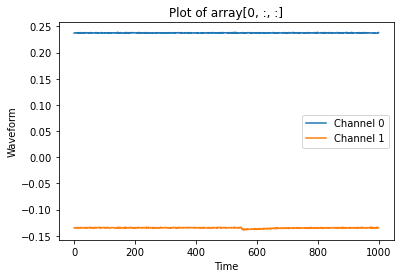

In [4]:
"""
import matplotlib.pyplot as plt
#rolling average over n (100ish) events 
#identify the peaks and onset event
# Plot the data along the third dimension for all rows at a specific index in the first dimension


i = 0
j = 2000
k = 3500
#for i in range (0,1):
  # index along the first dimension
    #print("i", i)
    #for j in range(array.shape[1]):  # loop through the second dimension (4 rows)
waveforms_subset_0 = acq01_data[j:k, 0, :1000]
waveforms_subset_1 = acq01_data[j:k, 1, :1000]
average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
average_waveform_1 = np.mean(waveforms_subset_1, axis=0)
plt.plot(average_waveform_0, label=f'Channel {0}')
plt.plot(average_waveform_1, label=f'Channel {1}')
    
    #plt.plot(acq01_data[i, 2, :], label=f'Channel {2}')
    #plt.plot(acq01_data[i, 3, :], label=f'Channel {3}')

plt.title(f'Plot of array[{i}, :, :]')
plt.xlabel('Time')
plt.ylabel('Waveform')
plt.legend()
plt.show()
#i = i + 1
"""



Waveform Indices of ch0 peaks: []
Values of ch0 peaks: []
Waveform Indices of ch1 peaks: [553 603]
Values of ch1 peaks: [0.16186523 0.15147705]
Index range of event numbers: 1700-1800


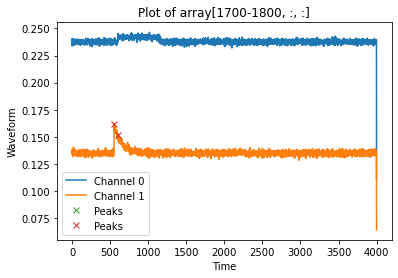

Waveform Indices of ch0 peaks: [ 604  674  753  824  917  983 1049 1101]
Values of ch0 peaks: [0.25952148 0.26048584 0.26102295 0.26141357 0.26003418 0.26037598
 0.26011963 0.25498047]
Waveform Indices of ch1 peaks: [552 602 663 718]
Values of ch1 peaks: [0.24360352 0.20435791 0.17460938 0.15782471]
Index range of event numbers: 1800-1900


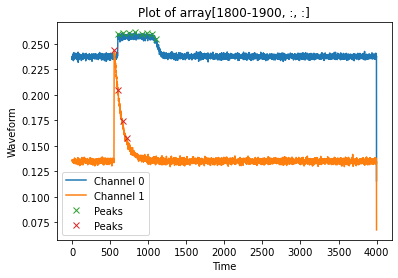

Waveform Indices of ch0 peaks: [ 650  710  775  837  888  968 1024 1078]
Values of ch0 peaks: [0.2612915  0.26072998 0.26119385 0.25910645 0.26177979 0.2602417
 0.26003418 0.25737305]
Waveform Indices of ch1 peaks: [554 613 663 714]
Values of ch1 peaks: [0.24526367 0.19805908 0.17084961 0.15899658]
Index range of event numbers: 1900-2000


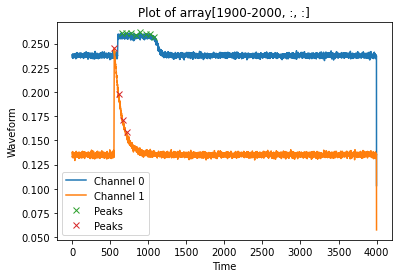

Waveform Indices of ch0 peaks: [ 643  715  791  871  940  996 1047 1106]
Values of ch0 peaks: [0.25976562 0.25980225 0.25957031 0.2609375  0.26029053 0.26022949
 0.26063232 0.25455322]
Waveform Indices of ch1 peaks: [554 606 656 708 773]
Values of ch1 peaks: [0.24022217 0.2        0.17353516 0.15982666 0.15054932]
Index range of event numbers: 2000-2100


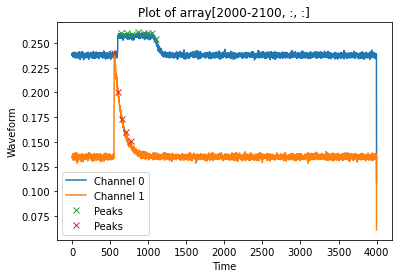

Waveform Indices of ch0 peaks: [ 647  697  749  799  850  909  980 1032 1086]
Values of ch0 peaks: [0.26137695 0.25943604 0.25975342 0.26157227 0.25926514 0.26107178
 0.26132812 0.25960693 0.25554199]
Waveform Indices of ch1 peaks: [554 606 657 707 761]
Values of ch1 peaks: [0.24368896 0.20133057 0.17481689 0.15981445 0.15064697]
Index range of event numbers: 2100-2200


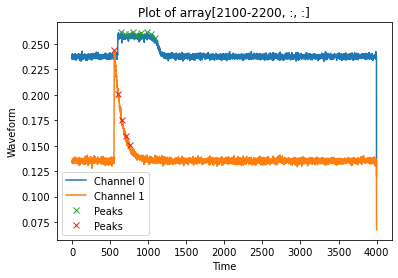

Waveform Indices of ch0 peaks: [ 627  706  807  861  936 1004 1079]
Values of ch0 peaks: [0.26138916 0.26069336 0.26149902 0.25957031 0.26057129 0.26087646
 0.25852051]
Waveform Indices of ch1 peaks: [553 606 661 717 771]
Values of ch1 peaks: [0.24500732 0.20352783 0.17287598 0.15812988 0.15089111]
Index range of event numbers: 2200-2300


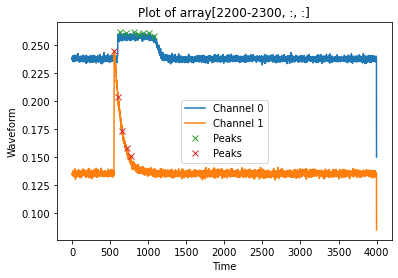

Waveform Indices of ch0 peaks: [ 609  685  743  805  904  995 1068 1130]
Values of ch0 peaks: [0.26016846 0.25999756 0.26026611 0.26158447 0.26038818 0.26083984
 0.25977783 0.25085449]
Waveform Indices of ch1 peaks: [554 604 659 713]
Values of ch1 peaks: [0.24829102 0.20373535 0.17583008 0.15855713]
Index range of event numbers: 2300-2400


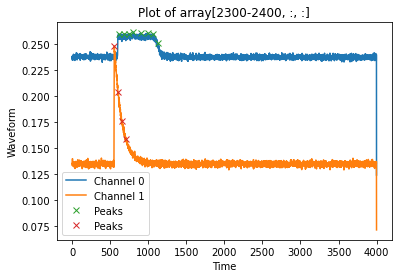

Waveform Indices of ch0 peaks: [ 600  650  730  798  849  913  986 1037 1089]
Values of ch0 peaks: [0.25494385 0.26037598 0.25974121 0.25910645 0.26049805 0.25882568
 0.26057129 0.25959473 0.25738525]
Waveform Indices of ch1 peaks: [553 603 655 719]
Values of ch1 peaks: [0.24458008 0.20150146 0.17441406 0.15898438]
Index range of event numbers: 2400-2500


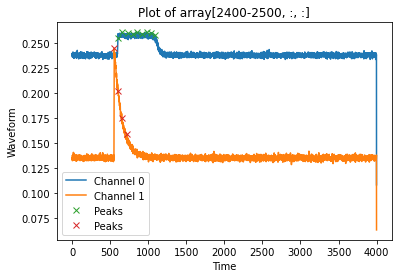

Waveform Indices of ch0 peaks: [ 645  696  752  805  863  914  965 1026 1085]
Values of ch0 peaks: [0.2605835  0.25859375 0.26116943 0.25872803 0.26085205 0.25931396
 0.26055908 0.26027832 0.25887451]
Waveform Indices of ch1 peaks: [556 607 661 717]
Values of ch1 peaks: [0.24888916 0.20155029 0.1737793  0.15982666]
Index range of event numbers: 2500-2600


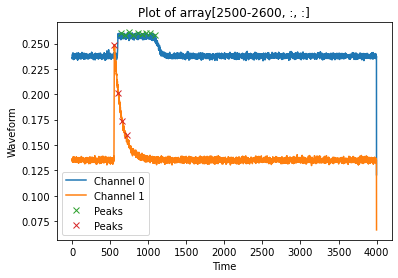

Waveform Indices of ch0 peaks: [ 622  672  735  829  904  974 1070 1129]
Values of ch0 peaks: [0.26242676 0.25900879 0.26052246 0.26010742 0.25996094 0.26064453
 0.26132812 0.25186768]
Waveform Indices of ch1 peaks: [552 602 654 708]
Values of ch1 peaks: [0.24522705 0.20507812 0.17648926 0.15991211]
Index range of event numbers: 2600-2700


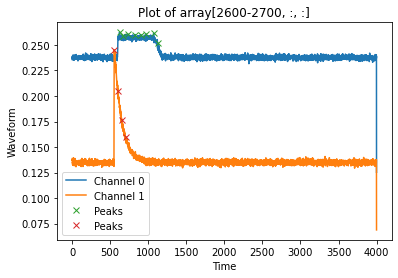

Waveform Indices of ch0 peaks: [ 604  666  759  827  903  983 1045 1102]
Values of ch0 peaks: [0.25947266 0.26098633 0.26005859 0.26081543 0.26070557 0.25938721
 0.25997314 0.25512695]
Waveform Indices of ch1 peaks: [556 608 659 718]
Values of ch1 peaks: [0.24627686 0.20478516 0.177771   0.1607666 ]
Index range of event numbers: 2700-2800


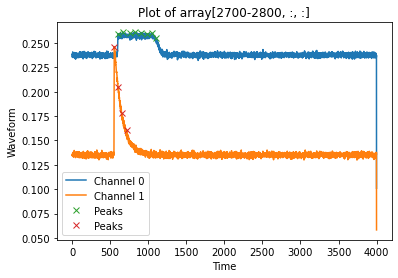

Waveform Indices of ch0 peaks: [ 615  665  718  776  827  909  962 1013 1077]
Values of ch0 peaks: [0.25856934 0.26055908 0.25861816 0.26082764 0.2600708  0.26029053
 0.2595459  0.26053467 0.25870361]
Waveform Indices of ch1 peaks: [555 607 665 717]
Values of ch1 peaks: [0.24743652 0.20107422 0.17587891 0.15683594]
Index range of event numbers: 2800-2900


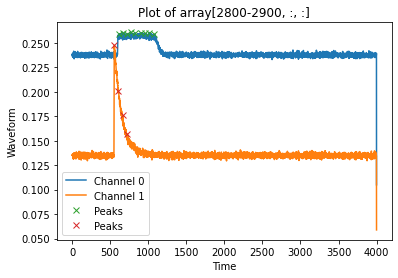

Waveform Indices of ch0 peaks: [ 628  688  779  831  906  958 1013 1073]
Values of ch0 peaks: [0.25921631 0.26068115 0.2619751  0.26066895 0.26008301 0.26124268
 0.26060791 0.25812988]
Waveform Indices of ch1 peaks: [554 605 656 712]
Values of ch1 peaks: [0.24620361 0.20316162 0.17479248 0.15963135]
Index range of event numbers: 2900-3000


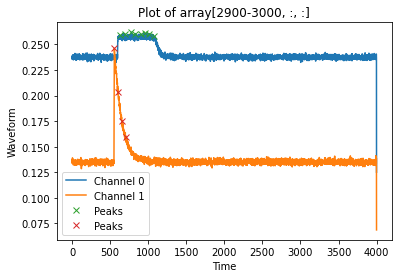

Waveform Indices of ch0 peaks: [ 615  666  761  822  885  978 1037 1095]
Values of ch0 peaks: [0.25963135 0.26038818 0.26124268 0.26064453 0.26166992 0.26105957
 0.26074219 0.25699463]
Waveform Indices of ch1 peaks: [556 608 662 714]
Values of ch1 peaks: [0.24489746 0.20004883 0.1753418  0.15740967]
Index range of event numbers: 3000-3100


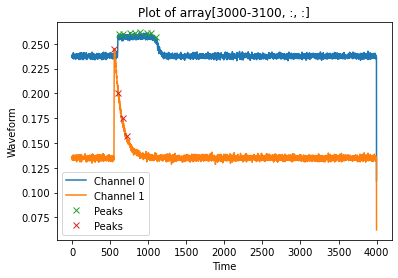

Waveform Indices of ch0 peaks: [ 644  707  781  875  929  985 1043 1097]
Values of ch0 peaks: [0.26116943 0.2605957  0.26070557 0.2604126  0.26092529 0.25900879
 0.26269531 0.25616455]
Waveform Indices of ch1 peaks: [554 607 658 708]
Values of ch1 peaks: [0.24650879 0.20109863 0.17370605 0.15878906]
Index range of event numbers: 3100-3200


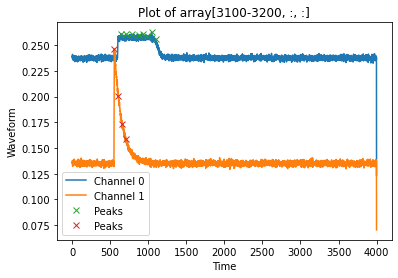

Waveform Indices of ch0 peaks: [ 624  703  765  817  905  969 1046 1105]
Values of ch0 peaks: [0.26033936 0.26149902 0.26000977 0.26202393 0.26083984 0.26124268
 0.25993652 0.25532227]
Waveform Indices of ch1 peaks: [554 604 657 707]
Values of ch1 peaks: [0.25054932 0.20576172 0.17692871 0.15947266]
Index range of event numbers: 3200-3300


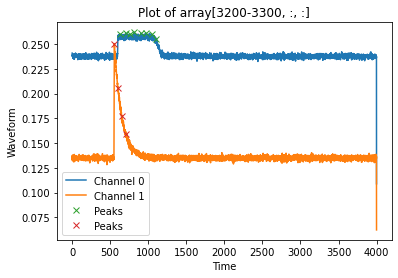

Waveform Indices of ch0 peaks: [ 623  682  767  819  905  961 1015 1069 1123]
Values of ch0 peaks: [0.26032715 0.25994873 0.26043701 0.2619751  0.26051025 0.25996094
 0.26142578 0.2588623  0.25300293]
Waveform Indices of ch1 peaks: [552 602 656 709 760]
Values of ch1 peaks: [0.24901123 0.21037598 0.17781982 0.15915527 0.150354  ]
Index range of event numbers: 3300-3400


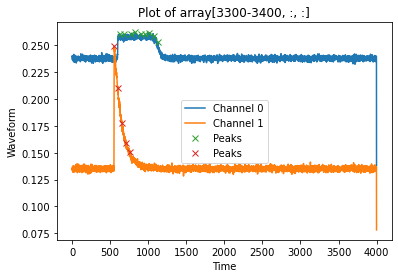

Waveform Indices of ch0 peaks: [ 611  668  729  787  849  909 1005 1057 1107]
Values of ch0 peaks: [0.2604248  0.26148682 0.25957031 0.2604126  0.26092529 0.26131592
 0.26029053 0.25922852 0.25655518]
Waveform Indices of ch1 peaks: [553 604 656 713]
Values of ch1 peaks: [0.2467041  0.20360107 0.17504883 0.15834961]
Index range of event numbers: 3400-3500


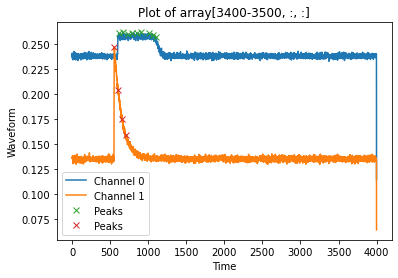

Waveform Indices of ch0 peaks: [ 629  679  761  834  887  939  999 1054 1105]
Values of ch0 peaks: [0.25981445 0.2619873  0.26142578 0.26080322 0.25784912 0.26085205
 0.26138916 0.26102295 0.25395508]
Waveform Indices of ch1 peaks: [552 605 655 705 755]
Values of ch1 peaks: [0.24765625 0.20513916 0.17573242 0.16079102 0.15078125]
Index range of event numbers: 3500-3600


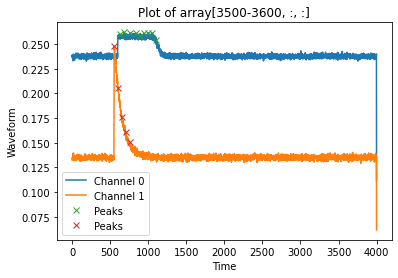

Waveform Indices of ch0 peaks: [ 605  677  755  822  901  952 1046 1099]
Values of ch0 peaks: [0.26176758 0.25976562 0.25980225 0.26119385 0.26043701 0.26015625
 0.26048584 0.25560303]
Waveform Indices of ch1 peaks: [554 606 663 715]
Values of ch1 peaks: [0.24886475 0.20472412 0.17521973 0.15948486]
Index range of event numbers: 3600-3700


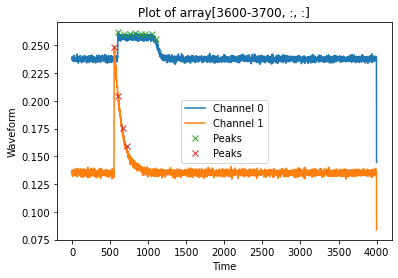

Waveform Indices of ch0 peaks: [ 648  699  761  818  899  985 1036 1096]
Values of ch0 peaks: [0.26003418 0.26010742 0.25955811 0.26104736 0.26212158 0.26121826
 0.25996094 0.25717773]
Waveform Indices of ch1 peaks: [553 607 658 710 762]
Values of ch1 peaks: [0.24946289 0.20384521 0.17645264 0.15919189 0.15081787]
Index range of event numbers: 3700-3800


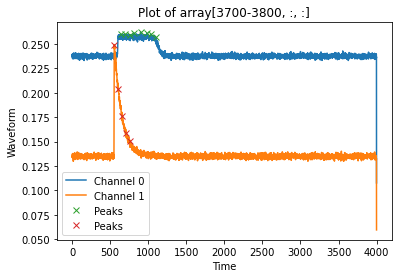

Waveform Indices of ch0 peaks: [ 602  682  735  818  877  952 1029 1082]
Values of ch0 peaks: [0.26099854 0.26075439 0.2600708  0.25991211 0.26120605 0.26009521
 0.26107178 0.25701904]
Waveform Indices of ch1 peaks: [553 606 658 708 764]
Values of ch1 peaks: [0.24914551 0.2032959  0.17546387 0.16064453 0.15059814]
Index range of event numbers: 3800-3900


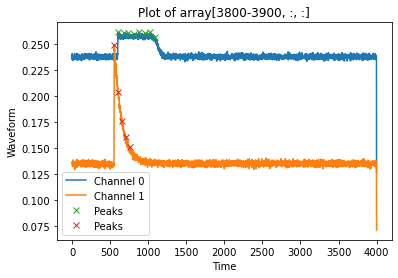

Waveform Indices of ch0 peaks: [ 603  655  717  773  824  880  959 1009 1060 1115]
Values of ch0 peaks: [0.26009521 0.25970459 0.26010742 0.2597168  0.25980225 0.26013184
 0.26098633 0.25632324 0.25900879 0.25184326]
Waveform Indices of ch1 peaks: [553 604 656 711 763]
Values of ch1 peaks: [0.23929443 0.19903564 0.17235107 0.159021   0.15113525]
Index range of event numbers: 3900-4000


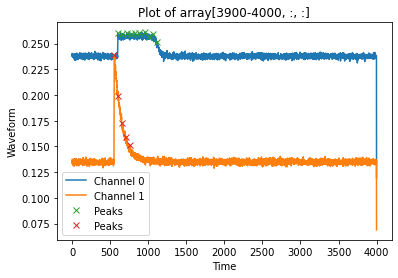

Waveform Indices of ch0 peaks: [ 612  683  778  828  881  953 1039 1090]
Values of ch0 peaks: [0.26053467 0.2600708  0.2619751  0.25804443 0.26063232 0.26112061
 0.26164551 0.25646973]
Waveform Indices of ch1 peaks: [554 605 655 709]
Values of ch1 peaks: [0.24915771 0.20683594 0.17810059 0.16052246]
Index range of event numbers: 4000-4100


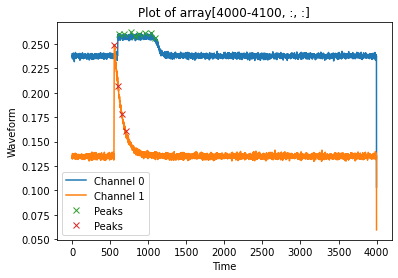

Waveform Indices of ch0 peaks: [ 634  688  770  848  921  971 1053]
Values of ch0 peaks: [0.25290527 0.25179443 0.25311279 0.25153809 0.25092773 0.25264893
 0.25198975]
Waveform Indices of ch1 peaks: [554 606 657]
Values of ch1 peaks: [0.2012085  0.17532959 0.15883789]
Index range of event numbers: 4100-4200


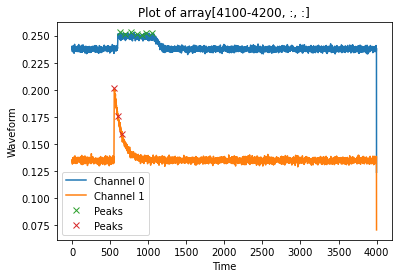

In [39]:
import matplotlib.pyplot as plt
avg_nEvents = 100 #number of events to average over

total_events = len(acq01_mean) #total number of events
height_threshold_0 = 0.25 #peak threshold ch0
height_threshold_1 = .15 #peak threshold ch1
distance_between_peaks = 50 

#looping through the events and averaging, then plotting events that contain peaks
for start in range(0,total_events, avg_nEvents):
    end = start + avg_nEvents
    #print("start", start)
    #print("end", end)
   
    #averaging the waveforms
    waveforms_subset_0 = acq01_data[start:end, 0, :]
    waveforms_subset_1 = acq01_data[start:end, 1, :]
    average_waveform_0 = np.mean(waveforms_subset_0, axis=0)
    average_waveform_1 = -np.mean(waveforms_subset_1, axis=0) #invert waveform because peakfinder only finds maximum peaks
    
    #find the peaks
    peaks0, properties = find_peaks(average_waveform_0, height=height_threshold_0, distance=distance_between_peaks)
    peaks1, properties = find_peaks(average_waveform_1, height=height_threshold_1, distance=distance_between_peaks) 
    

    #if average_waveform_1[peaks1] > height_threshold:
    #print(f'Indices of ch0 peaks: {peaks0}')
    #print(f'Values of ch0 peaks: {average_waveform_0[peaks0]}')
    #print(f'Indices of ch1 peaks: {peaks1}')
    #print(f'Values of ch1 peaks: {average_waveform_1[peaks1]}')
    #print(f'Indices of event number: {start}')   
    
    #onl
    if (peaks0.size>0) | (peaks1.size>0):
        print(f'Waveform Indices of ch0 peaks: {peaks0}')
        print(f'Values of ch0 peaks: {average_waveform_0[peaks0]}')
        print(f'Waveform Indices of ch1 peaks: {peaks1}')
        print(f'Values of ch1 peaks: {average_waveform_1[peaks1]}')
        print(f'Index range of event numbers: {start}-{end}')
        plt.plot(average_waveform_0, label=f'Channel {0}')
        plt.plot(average_waveform_1, label=f'Channel {1}')
        plt.plot(peaks0, average_waveform_0[peaks0], "x", label='Peaks')
        plt.plot(peaks1, average_waveform_1[peaks1], "x", label='Peaks')
   

        plt.title(f'Plot of array[{start}-{end}, :, :]')
        plt.xlabel('Time')
        plt.ylabel('Waveform')
        plt.legend()
        plt.show()
    
    
    
    event_num = []
    #if average_waveform_1[peaks1] > height_threshold:
    #    event_num.append(start)

#print("event_num array", event_num)
        
     
    
    
    